# Problem statement - Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [3]:
data=pd.read_csv(r'Reviews (1).csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
len(data.ProductId.unique())

74258

In [5]:
data.Score.value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [6]:
data.shape

(568454, 10)

In [7]:
data['Summary'][123]

'Palatable and healthy'

In [8]:
data['Text'][123]

"Before I was educated about feline nutrition, I allowed my cats to become addicted to dry cat food. I always offered both canned and dry, but wish I would have fed them premium quality canned food and limited dry food. I have two 15 year old cats and two 5 year old cats. The only good quality dry foods they will eat are Wellness and Innova. Innova's manufacturer was recently purchased by Procter&Gamble. I began looking for a replacement. After once again offering several samples (from my local holistic pet store) Holistic Select was the only one (other than the usual Wellness and Innova) they would eat. For finicky cats, I recommend trying Holistic Select. It is a good quality food that is very palatable for finicky eaters."

In [9]:
#Resizing data
df=data.sample(5000)


In [10]:
df.reset_index(inplace=True)

In [11]:
df=df.drop(columns=['index','Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator','Time','Summary'])

In [12]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [13]:
df

,Score,Text
0,2,The chocolates seemed to have been frozen at s...
1,5,Has a higher fat content then I like but power...
2,5,Received as promised. This coffee is an unusua...
3,5,These are excellent treats that I would recomm...
4,1,I got hit by the same problem many others have...
...,...,...
4995,5,"This is it, the only Kcup that is strong enoug..."
4996,5,ORGAIN VANILLA 12/CS ORGANIC 11OZ<br />Healthy...
4997,1,This will not work with the B155 as the needle...
4998,5,The product is one we have used for many years...


In [14]:
#df['Text'].iloc[0]

In [15]:
df.Score.value_counts()

Score
5    3225
4     719
1     471
3     352
2     233
Name: count, dtype: int64

In [16]:
df

,Score,Text
0,2,The chocolates seemed to have been frozen at s...
1,5,Has a higher fat content then I like but power...
2,5,Received as promised. This coffee is an unusua...
3,5,These are excellent treats that I would recomm...
4,1,I got hit by the same problem many others have...
...,...,...
4995,5,"This is it, the only Kcup that is strong enoug..."
4996,5,ORGAIN VANILLA 12/CS ORGANIC 11OZ<br />Healthy...
4997,1,This will not work with the B155 as the needle...
4998,5,The product is one we have used for many years...


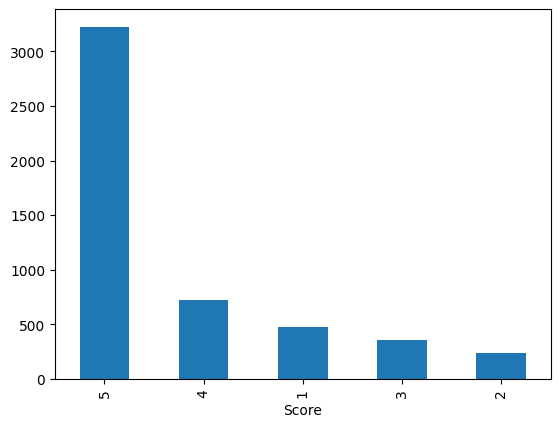

In [17]:
df.Score.value_counts().plot(kind='bar');

# 2.TEXT PREPROCESS

In [18]:
df.head()

,Score,Text
0,2,The chocolates seemed to have been frozen at s...
1,5,Has a higher fat content then I like but power...
2,5,Received as promised. This coffee is an unusua...
3,5,These are excellent treats that I would recomm...
4,1,I got hit by the same problem many others have...


# 2.1 Lowercase

In [19]:
#lowercase
df['Text']=df['Text'].str.lower()

In [20]:
df.head()

,Score,Text
0,2,the chocolates seemed to have been frozen at s...
1,5,has a higher fat content then i like but power...
2,5,received as promised. this coffee is an unusua...
3,5,these are excellent treats that i would recomm...
4,1,i got hit by the same problem many others have...


# 2.2 Punctuation Removal

In [21]:
#punctuation removal
import string
char=string.punctuation

In [22]:
char

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def pun_rem(text):
    for i in char:
        text=text.replace(i,'')
    return text

In [24]:
df['Text']=df['Text'].apply(pun_rem)

In [25]:
df['Text'][123]

'this product is of high quality and tasty too i used in on stuffed sole and the dinner guests said it was a favorite'

## 2.3 HTML TAGS

In [26]:
#remove htmltags
import re
def rem_html(text):
    pattern=re.compile('<.*?')
    text=text.replace(pattern,'')
    return text

In [27]:
df=df.apply(rem_html)

In [28]:
df

,Score,Text
0,2,the chocolates seemed to have been frozen at s...
1,5,has a higher fat content then i like but power...
2,5,received as promised this coffee is an unusual...
3,5,these are excellent treats that i would recomm...
4,1,i got hit by the same problem many others have...
...,...,...
4995,5,this is it the only kcup that is strong enough...
4996,5,orgain vanilla 12cs organic 11ozbr healthy ta...
4997,1,this will not work with the b155 as the needle...
4998,5,the product is one we have used for many years...


# 2.4 REMOVE url AND WWW

In [29]:
# remove URL
def rem_url(text):
    pattern=re.compile('https?://\S+|www.\S+')
    text=text.replace(pattern,'')
    return text

In [30]:
df=df.apply(rem_url)

In [31]:
#stopwordsremoval
df['Text'][54]

'french country spread at its  best the creamiest  texture with a little sweetness spread over toast or sweet breakfast bread or better yet french baguette its the closest thing to my mothers homemade chestnut recipe made me feel just a little homesick if you love chestnut at the holidays this is one to not forget '

# 2.5 Stop word removal

In [32]:
def stp_rem(text):
    token=text.split()
    tokens=[x for x in token if x not in stopwords.words('english')]
    feat=' '.join(tokens)
    return feat

In [33]:
df['Text']=df['Text'].apply(stp_rem)

In [34]:
df['Text'][14]

'bought cat bad breath thought would help wont eat smells walks away anyone want free bag chews'

# 2.6 LEMMITIZATION

In [35]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [36]:
wl=WordNetLemmatizer()

In [37]:
def lem(text):
    words=word_tokenize(text)
    lemm=[wl.lemmatize(i) for i in words]#since lemmitizer work on each word hence we need to have list of it
    return ' '.join(lemm)

In [38]:
df['Text'] = df['Text'].apply(lem)

In [39]:
df['Text']

0       chocolate seemed frozen time looked bit wrappe...
1       higher fat content like power bar eaten early ...
2       received promised coffee unusual departure keu...
3       excellent treat would recommend almost dog own...
4       got hit problem many others havedented can 12 ...
                              ...                        
4995    kcup strong enough taste largest setting say w...
4996    orgain vanilla 12cs organic 11ozbr healthy tas...
4997            work b155 needle hit bottom cup universal
4998    product one used many year little dog clearly ...
4999    love stuff havent tried beef cant make baked c...
Name: Text, Length: 5000, dtype: object

# 4. Text Vectorisation

In [40]:
x=df['Text']
y=df['Score']


In [41]:
x

0       chocolate seemed frozen time looked bit wrappe...
1       higher fat content like power bar eaten early ...
2       received promised coffee unusual departure keu...
3       excellent treat would recommend almost dog own...
4       got hit problem many others havedented can 12 ...
                              ...                        
4995    kcup strong enough taste largest setting say w...
4996    orgain vanilla 12cs organic 11ozbr healthy tas...
4997            work b155 needle hit bottom cup universal
4998    product one used many year little dog clearly ...
4999    love stuff havent tried beef cant make baked c...
Name: Text, Length: 5000, dtype: object

In [42]:
y

0       2
1       5
2       5
3       5
4       1
       ..
4995    5
4996    5
4997    1
4998    5
4999    5
Name: Score, Length: 5000, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_test.shape

((4000,), (1000,))

# 4.1 BOW

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,1))

In [45]:
x_train_bow=cv.fit_transform(x_train)
x_test_bow=cv.transform(x_test)
x_train_bow

<4000x14741 sparse matrix of type '<class 'numpy.int64'>'
	with 134407 stored elements in Compressed Sparse Row format>

In [46]:
x_train_bow.shape

(4000, 14741)

trying to find the documents and its vector

In [47]:
x_train[0]

'chocolate seemed frozen time looked bit wrapped christmas gift notice expiration date 123109 considering bought november happy careful future purchase'

In [48]:
h=x_train_bow.toarray()[0]
h

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
len(x_train_bow.toarray()[10])

14741

In [50]:
for i in range(0,len(h)):
    if h[i]!=0:
        print(i,h[i])

4400 1
4791 1
5108 1
5950 1
8273 1
13090 1
14619 1


In [51]:
lis=list(cv.vocabulary_.items())
lis
for i in lis:
    if i[1]==7391:
        print(i)
        break

('kind', 7391)


In [52]:
cv.vocabulary_

{'father': 5108,
 'drinking': 4400,
 'tea': 13090,
 'year': 14619,
 'good': 5950,
 'especially': 4791,
 'men': 8273,
 'great': 6068,
 'black': 1862,
 'must': 8675,
 'kitchen': 7404,
 'like': 7711,
 'box': 2029,
 'least': 7612,
 '40': 428,
 'per': 9715,
 'dont': 4316,
 'buy': 2270,
 'overpriced': 9411,
 'specialty': 12280,
 'cost': 3378,
 'buck': 2183,
 '16': 152,
 '20': 222,
 'bag': 1504,
 'said': 11299,
 'essential': 4802,
 'tetley': 13185,
 'classic': 2880,
 'british': 2140,
 'blend': 1884,
 'pg': 9789,
 'tip': 13398,
 'barrys': 1589,
 'gold': 5938,
 'may': 8169,
 'similar': 11853,
 'definitely': 3840,
 'strongest': 12638,
 'irish': 7099,
 'green': 6084,
 'even': 4845,
 'stronger': 12637,
 'generous': 5777,
 '80': 609,
 'count': 3401,
 'love': 7892,
 'freekeh': 5551,
 'expensive': 4951,
 'wonder': 14500,
 'paid': 9490,
 'much': 8631,
 'little': 7804,
 'however': 6665,
 'need': 8776,
 'feel': 5154,
 'full': 5657,
 'thought': 13312,
 'easy': 4518,
 'cook': 3311,
 'direction': 4125,
 'c

Found that order of x_train_bow is different from x_train

# 4.2 N-GRAM

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
bigm=CountVectorizer(ngram_range=(2,2))

In [54]:
x_train_bgm = bigm.fit_transform(x_train)
x_test_bgm=bigm.transform(x_test)
x_train_bgm.shape

(4000, 114885)

In [55]:
len(bigm.vocabulary_)

114885

In [56]:
bigm.vocabulary_

{'father drinking': 36972,
 'drinking tea': 31279,
 'tea year': 100774,
 'year good': 114063,
 'good especially': 44929,
 'especially men': 34100,
 'great black': 46173,
 'black tea': 11550,
 'tea must': 100565,
 'must kitchen': 66835,
 'kitchen like': 55282,
 'like box': 57715,
 'box tea': 13146,
 'tea least': 100527,
 'least 40': 56825,
 '40 per': 1210,
 'per box': 74887,
 'box dont': 12956,
 'dont buy': 30349,
 'buy overpriced': 15791,
 'overpriced specialty': 72754,
 'specialty tea': 93732,
 'tea cost': 100372,
 'cost buck': 24295,
 'buck 16': 15165,
 '16 20': 519,
 '20 bag': 667,
 'bag said': 8303,
 'said kitchen': 86081,
 'kitchen tea': 55293,
 'tea essential': 100414,
 'essential tetley': 34202,
 'tetley classic': 101281,
 'classic tetley': 20628,
 'tetley british': 101280,
 'british blend': 14949,
 'blend pg': 11741,
 'pg tip': 75361,
 'tip barrys': 103642,
 'barrys gold': 9001,
 'gold blend': 44643,
 'blend tea': 11765,
 'tea barrys': 100311,
 'barrys may': 9003,
 'may similar

# tri gram

In [57]:
trgm=CountVectorizer(ngram_range=(3,3))
x_train_trgm = trgm.fit_transform(x_train)
x_test_trgm=trgm.transform(x_test)

In [58]:
x_train_trgm.shape

(4000, 147882)

# 4.3 TF-IDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [60]:
x_train_tf = tf.fit_transform(x_train)
x_test_tf =tf.transform(x_test)
x_train_tf.shape


(4000, 14741)

In [61]:
tf.vocabulary_

{'father': 5108,
 'drinking': 4400,
 'tea': 13090,
 'year': 14619,
 'good': 5950,
 'especially': 4791,
 'men': 8273,
 'great': 6068,
 'black': 1862,
 'must': 8675,
 'kitchen': 7404,
 'like': 7711,
 'box': 2029,
 'least': 7612,
 '40': 428,
 'per': 9715,
 'dont': 4316,
 'buy': 2270,
 'overpriced': 9411,
 'specialty': 12280,
 'cost': 3378,
 'buck': 2183,
 '16': 152,
 '20': 222,
 'bag': 1504,
 'said': 11299,
 'essential': 4802,
 'tetley': 13185,
 'classic': 2880,
 'british': 2140,
 'blend': 1884,
 'pg': 9789,
 'tip': 13398,
 'barrys': 1589,
 'gold': 5938,
 'may': 8169,
 'similar': 11853,
 'definitely': 3840,
 'strongest': 12638,
 'irish': 7099,
 'green': 6084,
 'even': 4845,
 'stronger': 12637,
 'generous': 5777,
 '80': 609,
 'count': 3401,
 'love': 7892,
 'freekeh': 5551,
 'expensive': 4951,
 'wonder': 14500,
 'paid': 9490,
 'much': 8631,
 'little': 7804,
 'however': 6665,
 'need': 8776,
 'feel': 5154,
 'full': 5657,
 'thought': 13312,
 'easy': 4518,
 'cook': 3311,
 'direction': 4125,
 'c

# 4.4 WROD3VEC

In [62]:
#import gensim
#from gensim.models import Word2Vec,KeyedVectors

# 5 . Modeling

In [63]:
from sklearn.metrics import *

# BASE MODELS

# 5.1  Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression


In [65]:
lg=LogisticRegression(multi_class='multinomial')

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
model_bow = lg.fit(x_train_bow,y_train)
predict_bow=model_bow.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.66

In [68]:
model_bgm = lg.fit(x_train_bgm,y_train)
predict_bgm=model_bgm.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.662

In [69]:
model_tgm=lg.fit(x_train_trgm,y_train)
predict_tgm=model_tgm.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.657

In [70]:
model_tf=lg.fit(x_train_tf,y_train)
predict_tf=model_tf.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.68

In [71]:
#f=pd.DataFrame({'test':y_test,'predict':predict_tf})
#f.sample(10)


In [72]:
#confusion matrix for tf_idf since it is showing the highest accuracy in LGR model
confusion_matrix(y_test,predict_tf)

array([[ 19,   0,   0,   5,  76],
       [  3,   0,   0,   2,  32],
       [  2,   0,   0,  10,  65],
       [  1,   0,   0,  17, 116],
       [  2,   0,   0,   6, 644]], dtype=int64)

In [73]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           1       0.70      0.19      0.30       100
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        77
           4       0.42      0.13      0.20       134
           5       0.69      0.99      0.81       652

    accuracy                           0.68      1000
   macro avg       0.36      0.26      0.26      1000
weighted avg       0.58      0.68      0.59      1000



# 5 .2MNB

In [74]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [75]:
model_bow = mnb.fit(x_train_bow,y_train)
predict_bow= model_bow.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.663

In [76]:
#predict_bow
#check overfitting of model

In [77]:
model_bgm = mnb.fit(x_train_bgm,y_train)
predict_bgm= model_bgm.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.656

In [78]:
model_tgm = mnb.fit(x_train_trgm,y_train)
predict_tgm= model_tgm.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.657

In [79]:
model_tf = mnb.fit(x_train_tf,y_train)
predict_tf= model_tf.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.652

In [80]:
#predict_tf
#overfit model
confusion_matrix(y_test,predict_bow)
#predicted ---
#actual| 

array([[ 13,   0,   0,   9,  78],
       [  2,   0,   0,   1,  34],
       [  1,   0,   0,  10,  66],
       [  1,   0,   1,   8, 124],
       [  2,   0,   0,   8, 642]], dtype=int64)

In [81]:
print(classification_report(y_test,predict_bow))

              precision    recall  f1-score   support

           1       0.68      0.13      0.22       100
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        77
           4       0.22      0.06      0.09       134
           5       0.68      0.98      0.80       652

    accuracy                           0.66      1000
   macro avg       0.32      0.23      0.22      1000
weighted avg       0.54      0.66      0.56      1000



# 5.3 RANDOM FOREST

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [83]:
model_bow=rf.fit(x_train_bow,y_train)
predict_bow = rf.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.671

In [84]:
model_bgm=rf.fit(x_train_bgm,y_train)
predict_bgm = rf.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.67

In [85]:
model_tgm=rf.fit(x_train_trgm,y_train)
predict_tgm = rf.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.657

In [86]:
model_tf=rf.fit(x_train_tf,y_train)
predict_tf = rf.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.668

In [87]:
confusion_matrix(y_test,predict_bow)

array([[ 15,   0,   0,   0,  85],
       [  1,   0,   0,   0,  36],
       [  1,   0,   3,   2,  71],
       [  2,   0,   0,   2, 130],
       [  0,   0,   0,   1, 651]], dtype=int64)

In [88]:
print(classification_report(y_test,predict_bow))

              precision    recall  f1-score   support

           1       0.79      0.15      0.25       100
           2       0.00      0.00      0.00        37
           3       1.00      0.04      0.08        77
           4       0.40      0.01      0.03       134
           5       0.67      1.00      0.80       652

    accuracy                           0.67      1000
   macro avg       0.57      0.24      0.23      1000
weighted avg       0.65      0.67      0.56      1000



# 5.4 SVC

In [89]:
from sklearn.svm import SVC
svc=SVC()

In [90]:
model_bow=svc.fit(x_train_bow,y_train)
predict_bow=svc.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.662

In [91]:
model_bgm=svc.fit(x_train_bgm,y_train)
predict_bgm=svc.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.653

In [92]:
model_tgm=svc.fit(x_train_trgm,y_train)
predict_tgm=svc.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.653

In [93]:
model_tf=svc.fit(x_train_tf,y_train)
predict_tf=svc.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.661

In [94]:
confusion_matrix(predict_tf,y_test)

array([[  5,   1,   1,   0,   1],
       [  0,   0,   0,   0,   0],
       [  0,   0,   2,   0,   0],
       [  0,   0,   0,   3,   0],
       [ 95,  36,  74, 131, 651]], dtype=int64)

In [95]:
print(classification_report(predict_tf,y_test))

              precision    recall  f1-score   support

           1       0.05      0.62      0.09         8
           2       0.00      0.00      0.00         0
           3       0.03      1.00      0.05         2
           4       0.02      1.00      0.04         3
           5       1.00      0.66      0.79       987

    accuracy                           0.66      1000
   macro avg       0.22      0.66      0.20      1000
weighted avg       0.99      0.66      0.79      1000



AMONG ALL THE BASELINE MODELS SVC IN TF-IDF PERFORM BEST HAVING ACCURACY OF 66% AND WEIGHTED AVG F1-SCORE OF 0.79

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
np.mean(cross_val_score(svc,x_train_tf,y_train,cv=10,scoring='accuracy'))

0.6505

Through this  we cn know that our model is not overfitted

# Linear SVC


In [98]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()


In [99]:
model_tf=lsvc.fit(x_train_tf,y_train)
predict_tf=lsvc.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.69

In [100]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           1       0.61      0.47      0.53       100
           2       0.44      0.11      0.17        37
           3       0.33      0.12      0.17        77
           4       0.29      0.22      0.25       134
           5       0.76      0.92      0.84       652

    accuracy                           0.69      1000
   macro avg       0.49      0.37      0.39      1000
weighted avg       0.64      0.69      0.65      1000



In [101]:
confusion_matrix(predict_tf,y_test)

array([[ 47,   8,   3,   4,  15],
       [  2,   4,   3,   0,   0],
       [  2,   2,   9,   9,   5],
       [ 12,   5,  23,  29,  31],
       [ 37,  18,  39,  92, 601]], dtype=int64)

In [102]:
np.mean(cross_val_score(svc,x_train_tf,y_train,cv=10,scoring='accuracy'))

0.6505

# SGD

In [103]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
model_sgd=sgd.fit(x_train_tf,y_train)
predict_sgd=sgd.predict(x_test_tf)
accuracy_score(y_test,predict_sgd)

0.676

In [104]:
confusion_matrix(y_test,predict_sgd)

array([[ 46,   6,   3,  11,  34],
       [  8,   6,   2,   6,  15],
       [  4,   3,   9,  23,  38],
       [  4,   0,  10,  32,  88],
       [ 22,   3,   9,  35, 583]], dtype=int64)

In [105]:
print(classification_report(y_test,predict_sgd))

              precision    recall  f1-score   support

           1       0.55      0.46      0.50       100
           2       0.33      0.16      0.22        37
           3       0.27      0.12      0.16        77
           4       0.30      0.24      0.27       134
           5       0.77      0.89      0.83       652

    accuracy                           0.68      1000
   macro avg       0.44      0.37      0.39      1000
weighted avg       0.63      0.68      0.65      1000



# HYPERPARAMETER TUNING OF BASE MODEL

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [106]:
#parameters = {'':

SyntaxError: incomplete input (3253015190.py, line 1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rd=RandomizedSearchCV()

# ENSEMBLE TECHNIQUES

# VOTING CLASSIFIER

In [107]:
estimators=[('lg',lg),('rf',rf),('mnb',mnb),('lsvc',lsvc),('svc',svc)]

In [108]:
#estimators[0][0]

In [109]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting='hard')
model_vc=vc.fit(x_train_tf,y_train)
predict_vc=vc.predict(x_test_tf)
accuracy_score(y_test,predict_vc)

0.665

In [110]:
confusion_matrix(y_test,predict_vc)

array([[  7,   0,   0,   0,  93],
       [  1,   0,   0,   0,  36],
       [  1,   0,   2,   0,  74],
       [  1,   0,   0,   5, 128],
       [  1,   0,   0,   0, 651]], dtype=int64)

In [111]:
print(classification_report(y_test,predict_vc))

              precision    recall  f1-score   support

           1       0.64      0.07      0.13       100
           2       0.00      0.00      0.00        37
           3       1.00      0.03      0.05        77
           4       1.00      0.04      0.07       134
           5       0.66      1.00      0.80       652

    accuracy                           0.67      1000
   macro avg       0.66      0.23      0.21      1000
weighted avg       0.71      0.67      0.55      1000



In [112]:
x=cross_val_score(vc,x_train_tf,y_train,cv=10,scoring='accuracy')
print(np.mean(x))

0.65425


# BAGGING

In [113]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=lsvc,
                    n_estimators=50,
                    max_samples=0.3,
                    random_state=0)

In [114]:
model_bag = bg.fit(x_train_tf,y_train)
predict_bg = bg.predict(x_test_tf)
accuracy_score(y_test,predict_bg)

0.672

In [115]:
confusion_matrix(y_test,predict_bg)

array([[ 18,   0,   0,   2,  80],
       [  4,   0,   0,   2,  31],
       [  2,   0,   0,   7,  68],
       [  1,   0,   0,   9, 124],
       [  2,   0,   0,   5, 645]], dtype=int64)

In [116]:
print(classification_report(y_test,predict_bg))

              precision    recall  f1-score   support

           1       0.67      0.18      0.28       100
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        77
           4       0.36      0.07      0.11       134
           5       0.68      0.99      0.81       652

    accuracy                           0.67      1000
   macro avg       0.34      0.25      0.24      1000
weighted avg       0.56      0.67      0.57      1000



# BOOSTING

# Gradient Boost

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
model_gb = gb.fit(x_train_tf,y_train)
predict_gb = gb.predict(x_test_tf)
accuracy_score(y_test,predict_gb)


0.673

In [118]:
confusion_matrix(y_test,predict_gb)

array([[ 15,   1,   0,  11,  73],
       [  2,   1,   2,   4,  28],
       [  6,   1,   6,  11,  53],
       [  3,   2,   4,  19, 106],
       [  1,   2,   4,  13, 632]], dtype=int64)

In [119]:
print(classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           1       0.56      0.15      0.24       100
           2       0.14      0.03      0.05        37
           3       0.38      0.08      0.13        77
           4       0.33      0.14      0.20       134
           5       0.71      0.97      0.82       652

    accuracy                           0.67      1000
   macro avg       0.42      0.27      0.29      1000
weighted avg       0.60      0.67      0.60      1000



# XGBOOST

In [120]:
import xgboost

In [121]:
'''from xgboost import XGBClassifier
#xgb=XGBClassifier(objective='gblinear')
model_xgb=xgb.fit(x_train_tf,y_train)
predict_xgb=xgb.predict(x_test_tf)
accuracy_score(y_test,predict_xgb)

SyntaxError: incomplete input (3520070487.py, line 1)

# ADABOOST

In [122]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
model_adb = adb.fit(x_train_tf,y_train)
predict_adb = adb.predict(x_test_tf)
accuracy_score(y_test,predict_adb)

0.668

In [123]:
confusion_matrix(y_test,predict_adb)

array([[ 26,   4,   3,   6,  61],
       [  5,   5,   2,   0,  25],
       [  4,   4,   2,   6,  61],
       [  5,   2,   9,  15, 103],
       [  8,   9,  10,   5, 620]], dtype=int64)

In [124]:
print(classification_report(y_test,predict_adb))

              precision    recall  f1-score   support

           1       0.54      0.26      0.35       100
           2       0.21      0.14      0.16        37
           3       0.08      0.03      0.04        77
           4       0.47      0.11      0.18       134
           5       0.71      0.95      0.81       652

    accuracy                           0.67      1000
   macro avg       0.40      0.30      0.31      1000
weighted avg       0.60      0.67      0.60      1000



# LIGHT GBM

In [125]:
import lightgbm 
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()

In [126]:
model_lgb = lgb.fit(x_train_tf,y_train)
predict_lgb = lgb.predict(x_test_tf)
accuracy_score(y_test,predict_lgb)

0.696

In [127]:
confusion_matrix(y_test,predict_lgb)

array([[ 43,   2,   3,  12,  40],
       [  9,   2,   1,   5,  20],
       [  3,   1,  10,  15,  48],
       [  4,   0,   6,  35,  89],
       [  8,   3,   5,  30, 606]], dtype=int64)

In [128]:
print(classification_report(y_test,predict_lgb))

              precision    recall  f1-score   support

           1       0.64      0.43      0.51       100
           2       0.25      0.05      0.09        37
           3       0.40      0.13      0.20        77
           4       0.36      0.26      0.30       134
           5       0.75      0.93      0.83       652

    accuracy                           0.70      1000
   macro avg       0.48      0.36      0.39      1000
weighted avg       0.64      0.70      0.65      1000

